In [1]:
from tensorflow.keras.datasets import mnist
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


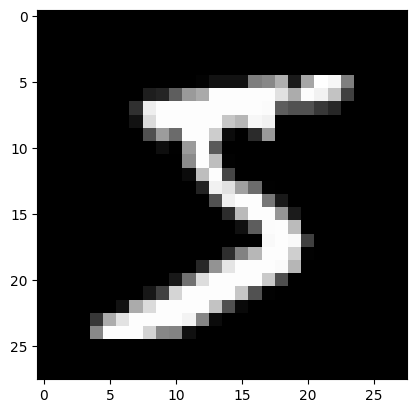

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
plt.imshow(x_train[0],cmap='gray')

In [4]:
#資料預處理(Normalize)
#圖形攤開一>keras MLP 規定一定要攤開成為1D  (0-1)
# x_train_shape=x_train.reshape(60000,784)/255
# x_test_shaoe=x_test.reshape(10000,784)/255

import numpy as np
x_train_norm = x_train.reshape(-1, 784) #reshape函数将二维数组转换为了一维数组
x_test_norm = x_test.reshape(-1, 784) 
#demo
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [5]:
#答案預處理(One-hot encoding)
#希望的樣子:[p0,p1,p2,p3...p6]
#5:[0,0,0,0,1,0,0,0,0,0]
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train, num_classes=10)
y_test_cat=to_categorical(y_test, num_classes=10)
print('原來',y_train[0])
print('後來',y_train_cat[0])




原來 5
後來 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from pandas.io.formats.style_render import Sequence
#建立蛋糕
#第一種:蛋糕支架(Sequential),堆上一層(Layers)
#Layers:Dense()#神經元輸出幾個
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


mlp=Sequential()
#第1層:input_dim告訴他輸入幾個
#param:784*128+128(bias)=100480
mlp.add(Dense(128,activation='relu',input_dim=784))
#param:128*10(神經元的連結)+(10個輸出，10個激活一>10個偏差
mlp.add(Dense(10,activation='softmax'))  #通常用於分類問題的輸出層，目標是預測輸入屬於每個可能類別的概率分佈。
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
#確定模型訓練方式
#隨機梯度(隨便選一個w隨機梯度(隨便選一個weights)  #以亂度來衡量距離(做機率的分類)
#loss:最後輸出一個:binary_crossentropy ，最後輸出多個:categorical_crossentropy
#optimizer:下降的時候優化一>基於動量(我在走的時候不是等速度，而有速度的累積)
mlp.compile(loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam' #山坡優化器
            )

In [10]:
#batch:看幾必(200)做一次梯度下降(修正)  #batchs不可以一次太多Rm(記憶體)會不足  
#epochs:看整份考古題看幾次(10)
#10個epochs,200batch:60000(整個考古題題目)*10/200一>3000(次的方向修正)
#可上網直接查詢文件看怎麼寫(查keras fit)
mlp.fit(x_train_norm,
    y_train_cat,
    batch_size=200,
    epochs=10, #可以直接改看的次數，改數字它會直接往上累積)可以直接改看的次數，改數字它會直接往上累積)
    validation_split=0.1  #做驗證
    )

#要看要看下面的val_loss的數字有沒有平滑差不多了，考慮如果過擬合就要停下來了

Epoch 1/10
270/270 [==============================] - 6s 18ms/step - loss: 6.2394 - accuracy: 0.8558 - val_loss: 1.5470 - val_accuracy: 0.9165
Epoch 2/10
270/270 [==============================] - 3s 12ms/step - loss: 1.1811 - accuracy: 0.9221 - val_loss: 0.9079 - val_accuracy: 0.9320
Epoch 3/10
270/270 [==============================] - 2s 7ms/step - loss: 0.6282 - accuracy: 0.9392 - val_loss: 0.7049 - val_accuracy: 0.9372
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.3949 - accuracy: 0.9507 - val_loss: 0.6003 - val_accuracy: 0.9453
Epoch 5/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2620 - accuracy: 0.9603 - val_loss: 0.5471 - val_accuracy: 0.9487
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1998 - accuracy: 0.9652 - val_loss: 0.4911 - val_accuracy: 0.9517
Epoch 7/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1562 - accuracy: 0.9699 - val_loss: 0.4892 - val_accuracy: 0.9535
Epoc

In [11]:
#直接把loss跟正確率算出來
mlp.evaluate(x_test_norm,y_test_cat)


313/313 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.9470


[0.4850010871887207, 0.9470000267028809]

In [12]:
#predict:機率 predict_classes:分類
# pre=mlp.predict_classes(x_test_shape) #此方式已停用
#函数默认在最后一个维度上进行操作，而在分类器输出的向量中，最后一个维度正好对应于类别数，因此我们可以使用 axis=-1 来沿着类别数的方向获取概率分布中概率值最大的元素的索引。
pre = np.argmax(mlp.predict(x_test_norm), axis=-1)#np.argmax()输出层一般使用 Softmax 激活函数，该函数会将模型的输出转换为概率分布，使得每个类别的概率值都在 0 到 1 之间，并且这些概率值之和为 1。因此，对于每个输入样本，模型会输出一个概率分布，其中概率值最大的类别被认为是模型的预测结果。
from sklearn.metrics import confusion_matrix  #混淆矩阵是一种用于评估分类器性能的方法
pd.DataFrame(confusion_matrix(y_test,pre))#在使用混淆矩阵等评估指标时，我们需要将预测结果的概率分布转换为类别标签(因為不是機率比較是數字比較)

313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,955,0,1,0,2,3,6,4,2,7
1,0,1118,1,4,0,1,2,3,3,3
2,10,5,963,22,2,1,3,13,12,1
3,2,1,10,965,0,13,0,5,12,2
4,1,2,7,1,910,1,18,4,5,33
5,3,0,0,31,4,821,14,1,12,6
6,15,5,2,2,4,7,918,1,3,1
7,2,7,12,7,3,0,2,975,1,19
8,9,1,6,29,4,12,4,3,895,11
9,4,3,1,18,17,3,2,6,5,950


In [13]:
#把分類錯誤的地方找出來
import numpy as np
np.nonzero(pre !=y_test)#返回预测结果和真实标签不相同的样本的索引。 
#np.nonzero() 它的作用是找到数组中所有非零元素的位置

(array([   7,    8,   33,  115,  149,  151,  217,  221,  247,  259,  274,
         290,  300,  321,  340,  358,  362,  421,  432,  435,  444,  445,
         447,  448,  456,  478,  497,  502,  522,  528,  543,  551,  552,
         562,  582,  583,  591,  601,  606,  613,  619,  655,  659,  684,
         685,  691,  694,  707,  717,  839,  844,  846,  882,  890,  894,
         898,  900,  926,  938,  951,  956,  965,  975, 1003, 1014, 1032,
        1039, 1044, 1082, 1101, 1107, 1112, 1156, 1173, 1181, 1182, 1192,
        1200, 1216, 1242, 1247, 1253, 1270, 1274, 1289, 1299, 1319, 1326,
        1328, 1357, 1364, 1378, 1413, 1422, 1436, 1440, 1447, 1464, 1465,
        1466, 1494, 1500, 1522, 1530, 1531, 1533, 1549, 1553, 1562, 1587,
        1609, 1611, 1621, 1640, 1678, 1681, 1695, 1696, 1717, 1751, 1774,
        1790, 1813, 1819, 1823, 1828, 1850, 1865, 1899, 1901, 1909, 1952,
        1970, 1981, 1984, 1987, 2004, 2018, 2024, 2035, 2040, 2043, 2052,
        2053, 2063, 2070, 2098, 2109, 

<Figure size 1400x3000 with 0 Axes>

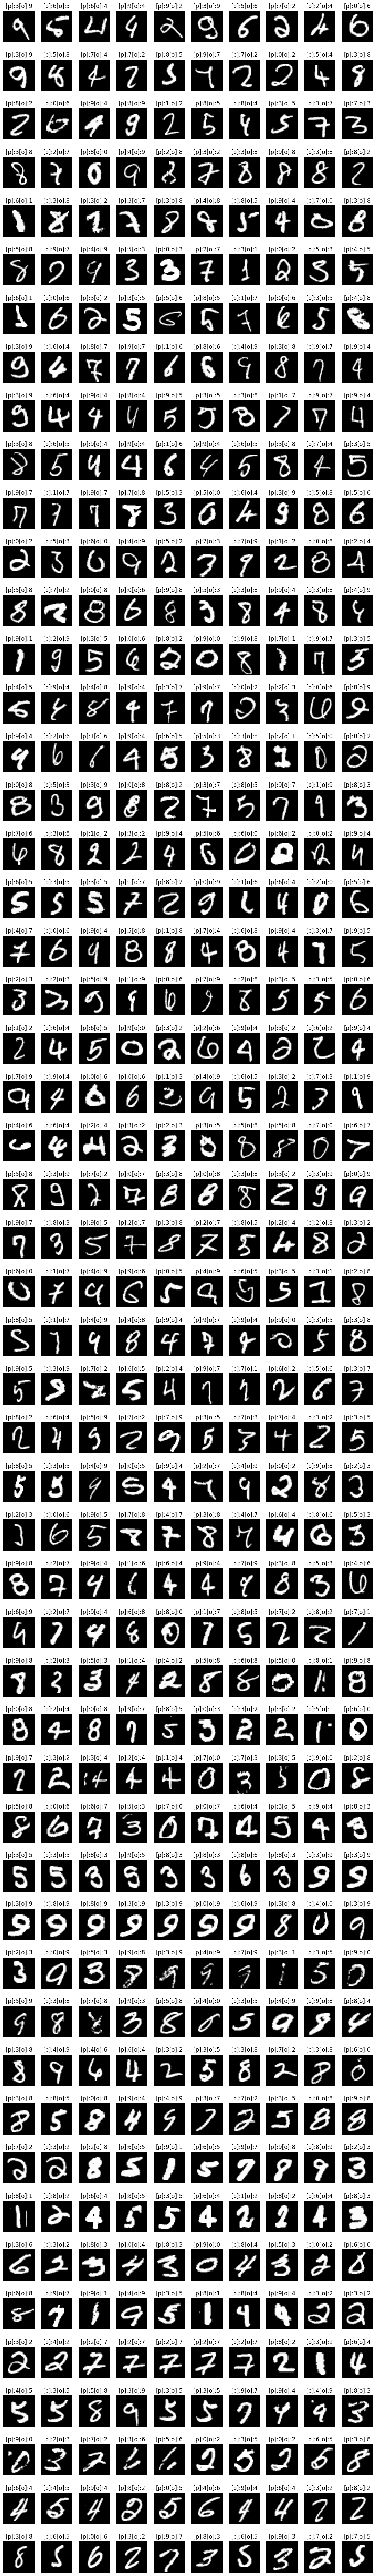

In [26]:
#numpy 才能這樣每個數字做比較
import numpy as np
#list:list[一個數字]
# numpy array:narray[[多個數字]]
diff=np.nonzero(pre!=y_test)[0]
#預測錯誤的圖的原本標籤
orifalse=y_test[diff]
#預測錯誤圖的預測標籤
prefalse=pre[diff]
#把圖拿出來
imgfalse=x_test[diff]
#整張圖的高寬
plt.figure(figsize=(14,30))
#我們每一列就是10個

# weight=10
# height = int(len(imgfalse) / 10) + 1
plt.figure(figsize=(14,100))
for (i, img) in enumerate(imgfalse):
  #(列數,行數,第幾張圖(i開始)
  plt.subplot(height,weight,i+1)#subplot函数来创建一个包含多个子图的图形
  
  plt.axis('off')
  t='[p]:'+str(prefalse[i])+'[o]:'+str(orifalse[i])
  plt.title(t)
  plt.imshow(img,cmap='gray')
#表示展示预测错误的图像时，每行展示10个图像，行数根据实际情况计算得出。而当前子图的编号i+1则是根据当前正在处理的图像的索引计算得出，也是从1开始逐个递增的，因为在subplot函数中，编号也是从1开始的